In [1]:
import pandas as pd
import numpy as np

In [2]:
CompustatData = pd.read_csv('../RawData/COMPUSTAT/compustat_data.csv')
#CompustatData=pd.notnull(CompustatData)
CompustatData.head()

gvkey  datadate   fyear indfmt consol popsrc datafmt  tic      cusip  \
0   1004  19940531  1993.0   INDL      C      D     STD  AIR  000361105   
1   1004  19950531  1994.0   INDL      C      D     STD  AIR  000361105   
2   1004  19960531  1995.0   INDL      C      D     STD  AIR  000361105   
3   1004  19970531  1996.0   INDL      C      D     STD  AIR  000361105   
4   1004  19980531  1997.0   INDL      C      D     STD  AIR  000361105   

       conm  ...    csho      pi     sale  exchg     cik  costat  fic  \
0  AAR CORP  ...  15.906  13.684  407.754   11.0  1750.0       A  USA   
1  AAR CORP  ...  15.961  14.713  451.395   11.0  1750.0       A  USA   
2  AAR CORP  ...  15.998  22.782  504.990   11.0  1750.0       A  USA   
3  AAR CORP  ...  18.204  32.975  589.328   11.0  1750.0       A  USA   
4  AAR CORP  ...  27.704  51.157  782.123   11.0  1750.0       A  USA   

    prcc_f     naics   sic  
0  14.3750  423860.0  5080  
1  15.2500  423860.0  5080  
2  22.1250  423860.0  5080  
3  31.0000  423860.0  5080  
4  26.4375  423860.0  5080  

[5 rows x 22 columns]

In [3]:
CompustatData=CompustatData[(CompustatData.fyear>1993) & (CompustatData.fyear<2019)]
CompustatData=CompustatData[~np.isnan(CompustatData.fyear)]
CompustatData.fyear=CompustatData.fyear.astype(int)
CompustatData = CompustatData.drop_duplicates(subset = ['gvkey', 'fyear']) #this is not ok.
#CompustatData = CompustatData.sort_values(['gvkey', 'fyear'])
#CompustatData = CompustatData.set_index(['gvkey', 'fyear'], verify_integrity = True, drop = False)
CompustatData = CompustatData[CompustatData['fic'] == 'USA']

In [4]:
CompustatData['mkvalt'] = CompustatData['csho'] * CompustatData['prcc_f']

In [5]:
naics_labels=['Agriculture, Forestry, Fishing and Hunting',\
        'Mining, Quarrying, and Oil and Gas Extraction',\
        'Utilities',\
        'Construction',\
        'NA1',\
        'Manufacturing',\
        'NA2',\
        'Wholesale Trade',\
        'Retail Trade',\
        'NA3',\
        'Transportation and Warehousing',\
        'NA4',\
        'Information',\
        'Finance and Insurance',\
        'Real Estate and Rental and Leasing',\
        'Professional, Scientific, and Technical Services',\
        'Management of Companies and Enterprises',\
        'Administrative and Support and Waste Management and Remediation Services',\
        'Educational Services',\
        'Health Care and Social Assistance',\
        'Arts, Entertainment, and Recreation',\
        'Accommodation and Food Service',\
        'Other Services','Public administration']


naics_code=[11,21,22,23,24,31,35,42,44,46,48,50,51,52,53,54,55,56,61,62,71,72,81,83,92]
n=24


#naics_labels=['Ag. Mining and Utilities',\
#        'Consts and Mfg',\
#        'Trade and warehousing',\
#        'Information and FIRE',\
#        'RE',\
#        'Professional services',\
#        'Nonprof services']

#naics_code=[11,23,42,51,53,54,57,92]

CompustatData['naics_label']=pd.cut(CompustatData['naics']/10**4,naics_code[:n+1],labels=naics_labels[:n],include_lowest=True,right=False)
CompustatData['naics_code_cat']=pd.cut(CompustatData['naics']/10**4,naics_code[:n+1],include_lowest=True,right=False)
CompustatData['naics_2d']=pd.cut(CompustatData['naics']/10**4,naics_code[:n+1],labels=naics_code[:n],include_lowest=True,right=False)

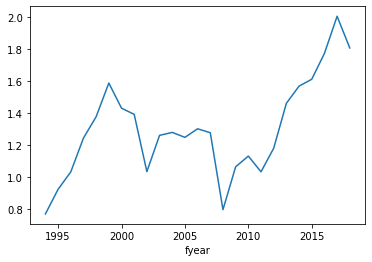

In [6]:
temp=pd.pivot_table(CompustatData, values=['mkvalt','sale'], columns=['fyear'], aggfunc=np.sum).T
temp['ratio']=temp.mkvalt/temp.sale
temp.ratio.plot()

In [7]:
naics_year_count = pd.pivot_table(CompustatData, values='sale', index=['naics_label'], columns=['fyear'], aggfunc=len)
naics_year_sales = pd.pivot_table(CompustatData, values='sale', index=['naics_label'], columns=['fyear'], aggfunc=np.sum)
naics_year_mktval =pd.pivot_table(CompustatData, values='mkvalt', index=['naics_label'], columns=['fyear'], aggfunc=np.sum)
naics_year_ps_multiple=naics_year_mktval/naics_year_sales
naics_year_sales=naics_year_sales/naics_year_sales.sum()*100
naics_year_mktval = naics_year_mktval/naics_year_mktval.sum()*100

In [8]:
display(naics_year_count.T.describe().T)


count     mean  \
naics_label                                                          
Agriculture, Forestry, Fishing and Hunting           25.0    21.72   
Mining, Quarrying, and Oil and Gas Extraction        25.0   265.44   
Utilities                                            25.0    97.60   
Construction                                         25.0    93.52   
Manufacturing                                        25.0  2598.60   
Wholesale Trade                                      25.0   216.36   
Retail Trade                                         25.0   292.72   
Transportation and Warehousing                       25.0   152.32   
Information                                          25.0   841.52   
Finance and Insurance                                25.0  2218.60   
Real Estate and Rental and Leasing                   25.0   313.92   
Professional, Scientific, and Technical Services     25.0   303.32   
Administrative and Support and Waste Management...   25.0   159.48   
Educational Services                                 25.0    27.80   
Health Care and Social Assistance                    25.0   141.72   
Arts, Entertainment, and Recreation                  25.0    56.52   
Accommodation and Food Service                       25.0   145.04   
Other Services                                       25.0    25.52   

                                                           std     min  \
naics_label                                                              
Agriculture, Forestry, Fishing and Hunting            6.496922     9.0   
Mining, Quarrying, and Oil and Gas Extraction        40.846338   144.0   
Utilities                                            21.215168    62.0   
Construction                                         24.539288    56.0   
Manufacturing                                       573.369500  1667.0   
Wholesale Trade                                      80.290556   112.0   
Retail Trade                                        103.706525   148.0   
Transportation and Warehousing                       28.257329    94.0   
Information                                         266.208740   438.0   
Finance and Insurance                               275.865154  1923.0   
Real Estate and Rental and Leasing                   22.364257   283.0   
Professional, Scientific, and Technical Services    130.510447   115.0   
Administrative and Support and Waste Management...   57.534859    78.0   
Educational Services                                  5.139715    14.0   
Health Care and Social Assistance                    49.741431    63.0   
Arts, Entertainment, and Recreation                  16.490199    28.0   
Accommodation and Food Service                       56.259429    75.0   
Other Services                                       15.119303     8.0   

                                                       25%     50%     75%  \
naics_label                                                                  
Agriculture, Forestry, Fishing and Hunting            18.0    20.0    26.0   
Mining, Quarrying, and Oil and Gas Extraction        261.0   269.0   296.0   
Utilities                                             84.0    91.0   104.0   
Construction                                          78.0    83.0   114.0   
Manufacturing                                       2172.0  2490.0  3107.0   
Wholesale Trade                                      165.0   177.0   267.0   
Retail Trade                                         220.0   260.0   374.0   
Transportation and Warehousing                       133.0   157.0   172.0   
Information                                          654.0   743.0  1087.0   
Finance and Insurance                               2034.0  2099.0  2335.0   
Real Estate and Rental and Leasing                   294.0   311.0   329.0   
Professional, Scientific, and Technical Services     194.0   287.0   410.0   
Administrative and Support and Waste Management...   111.0   145.0   215.0   


In [9]:
display(naics_year_count)

fyear                                                 1994    1995    1996  \
naics_label                                                                  
Agriculture, Forestry, Fishing and Hunting            29.0    32.0    34.0   
Mining, Quarrying, and Oil and Gas Extraction        300.0   303.0   302.0   
Utilities                                            140.0   136.0   135.0   
Construction                                         132.0   135.0   134.0   
Manufacturing                                       3316.0  3502.0  3523.0   
Wholesale Trade                                      357.0   362.0   361.0   
Retail Trade                                         453.0   468.0   473.0   
Transportation and Warehousing                       193.0   199.0   196.0   
Information                                          954.0  1098.0  1166.0   
Finance and Insurance                               2223.0  2173.0  2108.0   
Real Estate and Rental and Leasing                   304.0   319.0   335.0   
Professional, Scientific, and Technical Services     397.0   449.0   486.0   
Administrative and Support and Waste Management...   215.0   244.0   250.0   
Educational Services                                  28.0    30.0    31.0   
Health Care and Social Assistance                    234.0   241.0   229.0   
Arts, Entertainment, and Recreation                   80.0    80.0    80.0   
Accommodation and Food Service                       225.0   239.0   243.0   
Other Services                                        44.0    52.0    51.0   

fyear                                                 1997    1998    1999  \
naics_label                                                                  
Agriculture, Forestry, Fishing and Hunting            32.0    30.0    27.0   
Mining, Quarrying, and Oil and Gas Extraction        277.0   261.0   265.0   
Utilities                                            131.0   124.0   117.0   
Construction                                         133.0   134.0   122.0   
Manufacturing                                       3456.0  3392.0  3276.0   
Wholesale Trade                                      337.0   323.0   306.0   
Retail Trade                                         448.0   431.0   409.0   
Transportation and Warehousing                       183.0   180.0   174.0   
Information                                         1227.0  1315.0  1305.0   
Finance and Insurance                               2006.0  2012.0  2067.0   
Real Estate and Rental and Leasing                   329.0   328.0   317.0   
Professional, Scientific, and Technical Services     496.0   511.0   502.0   
Administrative and Support and Waste Management...   244.0   242.0   233.0   
Educational Services                                  33.0    34.0    39.0   
Health Care and Social Assistance                    206.0   184.0   177.0   
Arts, Entertainment, and Recreation                   80.0    76.0    75.0   
Accommodation and Food Service                       232.0   218.0   208.0   
Other Services                                        50.0    43.0    42.0   

fyear                                                 2000    2001    2002  \
naics_label                                                                  
Agriculture, Forestry, Fishing and Hunting            25.0    26.0    26.0   
Mining, Quarrying, and Oil and Gas Extraction        272.0   261.0   254.0   
Utilities                                            104.0   102.0   102.0   
Construction                                         114.0   104.0    93.0   
Manufacturing                                       3107.0  2950.0  2830.0   
Wholesale Trade                                      267.0   244.0   230.0   
Retail Trade                                         374.0   344.0   327.0   
Transportation and Warehousing                       172.0   168.0   165.0   
Information                                         1212.0  1087.0   988.0   
Finance and Insuranc

In [10]:

display(naics_year_sales.T.describe().T)


count       mean  \
naics_label                                                            
Agriculture, Forestry, Fishing and Hunting           25.0   0.110663   
Mining, Quarrying, and Oil and Gas Extraction        25.0   1.367518   
Utilities                                            25.0   1.397928   
Construction                                         25.0   1.071543   
Manufacturing                                        25.0  34.378515   
Wholesale Trade                                      25.0   6.230241   
Retail Trade                                         25.0  15.025363   
Transportation and Warehousing                       25.0   5.562484   
Information                                          25.0  10.534982   
Finance and Insurance                                25.0  16.917391   
Real Estate and Rental and Leasing                   25.0   1.234424   
Professional, Scientific, and Technical Services     25.0   1.621161   
Administrative and Support and Waste Management...   25.0   1.177531   
Educational Services                                 25.0   0.124273   
Health Care and Social Assistance                    25.0   1.423730   
Arts, Entertainment, and Recreation                  25.0   0.185782   
Accommodation and Food Service                       25.0   1.515737   
Other Services                                       25.0   0.120735   

                                                         std        min  \
naics_label                                                               
Agriculture, Forestry, Fishing and Hunting          0.054757   0.003941   
Mining, Quarrying, and Oil and Gas Extraction       0.222877   0.968731   
Utilities                                           0.264371   0.990858   
Construction                                        0.251505   0.779970   
Manufacturing                                       2.373158  31.140478   
Wholesale Trade                                     0.967110   4.459984   
Retail Trade                                        1.461805  12.699186   
Transportation and Warehousing                      0.316258   5.172716   
Information                                         0.791572   8.459532   
Finance and Insurance                               2.299353  13.669614   
Real Estate and Rental and Leasing                  0.303056   0.677233   
Professional, Scientific, and Technical Services    0.232228   1.217255   
Administrative and Support and Waste Management...  0.102683   1.026411   
Educational Services                                0.038536   0.072800   
Health Care and Social Assistance                   0.218958   1.123715   
Arts, Entertainment, and Recreation                 0.035442   0.124479   
Accommodation and Food Service                      0.080601   1.376486   
Other Services                                      0.034937   0.055134   

                                                          25%        50%  \
naics_label                                                                
Agriculture, Forestry, Fishing and Hunting           0.089876   0.124775   
Mining, Quarrying, and Oil and Gas Extraction        1.242030   1.327471   
Utilities                                            1.178511   1.417970   
Construction                                         0.878442   1.023130   
Manufacturing                                       32.572988  34.008520   
Wholesale Trade                                      5.503932   5.983889   
Retail Trade                                        14.099588  15.412831   
Transportation and Warehousing                       5.362275   5.473240   
Information                                         10.110015  10.737194   
Finance and Insurance                               14.795542  16.006926   
Real Estate and Rental and Leasing                   1.021753   1.234066   
Professional, Scientific, and Technical Services     1.455760   1.617583   
Administrative and Support and Waste Managemen

In [11]:
display(naics_year_mktval)

fyear                                                    1994       1995  \
naics_label                                                                
Agriculture, Forestry, Fishing and Hunting           0.217631   0.192928   
Mining, Quarrying, and Oil and Gas Extraction        1.964540   1.865740   
Utilities                                            1.095833   0.799188   
Construction                                         0.342389   0.297719   
Manufacturing                                       43.972228  44.487155   
Wholesale Trade                                      1.408793   1.379396   
Retail Trade                                         6.906009   5.477932   
Transportation and Warehousing                       2.311186   2.372682   
Information                                         17.471641  18.624108   
Finance and Insurance                               16.440629  16.598975   
Real Estate and Rental and Leasing                   1.220292   1.243241   
Professional, Scientific, and Technical Services     1.707905   1.801152   
Administrative and Support and Waste Management...   1.432550   1.287323   
Educational Services                                 0.144141   0.137407   
Health Care and Social Assistance                    1.484628   1.413488   
Arts, Entertainment, and Recreation                  0.239707   0.151115   
Accommodation and Food Service                       1.457061   1.672179   
Other Services                                       0.182836   0.198273   

fyear                                                    1996       1997  \
naics_label                                                                
Agriculture, Forestry, Fishing and Hunting           0.184492   0.188476   
Mining, Quarrying, and Oil and Gas Extraction        2.170194   1.774902   
Utilities                                            0.775740   0.626868   
Construction                                         0.278737   0.266390   
Manufacturing                                       44.681089  41.851269   
Wholesale Trade                                      1.459720   1.331752   
Retail Trade                                         5.585286   5.960137   
Transportation and Warehousing                       2.254198   1.966989   
Information                                         15.841483  16.930812   
Finance and Insurance                               18.141330  20.796164   
Real Estate and Rental and Leasing                   1.490530   1.711914   
Professional, Scientific, and Technical Services     2.348418   2.442814   
Administrative and Support and Waste Management...   1.277828   1.222710   
Educational Services                                 0.141675   0.149932   
Health Care and Social Assistance                    1.308361   1.015436   
Arts, Entertainment, and Recreation                  0.166052   0.181044   
Accommodation and Food Service                       1.642152   1.355111   
Other Services                                       0.252715   0.227283   

fyear                                                    1998       1999  \
naics_label                                                                
Agriculture, Forestry, Fishing and Hunting           0.165438   0.043017   
Mining, Quarrying, and Oil and Gas Extraction        0.860737   0.850277   
Utilities                                            0.510882   0.396940   
Construction                                         0.237240   0.171909   
Manufacturing                                       40.522766  37.631895   
Wholesale Trade                                      1.312287   0.990042   
Retail Trade                                         7.529338   6.190506   
Transportation and Warehousing                       1.659659   1.810137   
Information                                         20.952675  30.325904   
Finance and Insurance                               18.683766  14.311268   
Real Estate and Rental and Leasing            

In [12]:
display(naics_year_mktval.T.describe().T)


count       mean  \
naics_label                                                            
Agriculture, Forestry, Fishing and Hunting           25.0   0.087759   
Mining, Quarrying, and Oil and Gas Extraction        25.0   1.791393   
Utilities                                            25.0   0.592604   
Construction                                         25.0   0.427810   
Manufacturing                                        25.0  39.874980   
Wholesale Trade                                      25.0   1.262869   
Retail Trade                                         25.0   7.496531   
Transportation and Warehousing                       25.0   2.795937   
Information                                          25.0  17.302152   
Finance and Insurance                                25.0  20.278357   
Real Estate and Rental and Leasing                   25.0   2.510702   
Professional, Scientific, and Technical Services     25.0   1.742178   
Administrative and Support and Waste Management...   25.0   0.975945   
Educational Services                                 25.0   0.168044   
Health Care and Social Assistance                    25.0   0.796059   
Arts, Entertainment, and Recreation                  25.0   0.175188   
Accommodation and Food Service                       25.0   1.627107   
Other Services                                       25.0   0.094386   

                                                         std        min  \
naics_label                                                               
Agriculture, Forestry, Fishing and Hunting          0.057618   0.006700   
Mining, Quarrying, and Oil and Gas Extraction       0.718297   0.808599   
Utilities                                           0.164987   0.380657   
Construction                                        0.141148   0.171909   
Manufacturing                                       2.726138  35.056487   
Wholesale Trade                                     0.141128   0.917544   
Retail Trade                                        2.791483   5.477932   
Transportation and Warehousing                      0.750176   1.659659   
Information                                         3.188732  14.532095   
Finance and Insurance                               2.667849  14.311268   
Real Estate and Rental and Leasing                  1.036492   1.132546   
Professional, Scientific, and Technical Services    0.566360   1.234746   
Administrative and Support and Waste Management...  0.178107   0.710948   
Educational Services                                0.085090   0.059434   
Health Care and Social Assistance                   0.258184   0.393818   
Arts, Entertainment, and Recreation                 0.038205   0.101964   
Accommodation and Food Service                      0.377483   0.902541   
Other Services                                      0.063166   0.031538   

                                                          25%        50%  \
naics_label                                                                
Agriculture, Forestry, Fishing and Hunting           0.056946   0.078648   
Mining, Quarrying, and Oil and Gas Extraction        1.254999   1.774902   
Utilities                                            0.478628   0.611017   
Construction                                         0.297719   0.443892   
Manufacturing                                       37.897202  39.879046   
Wholesale Trade                                      1.212955   1.291153   
Retail Trade                                         6.906009   7.092943   
Transportation and Warehousing                       2.257111   2.738405   
Information                                         15.199913  16.930812   
Finance and Insurance                               18.683766  20.572481   
Real Estate and Rental and Leasing                   1.490530   2.499954   
Professional, Scientific, and Technical Services     1.445983   1.563531   
Administrative and Support and Waste Managemen

In [13]:
display(naics_year_mktval)

fyear                                                    1994       1995  \
naics_label                                                                
Agriculture, Forestry, Fishing and Hunting           0.217631   0.192928   
Mining, Quarrying, and Oil and Gas Extraction        1.964540   1.865740   
Utilities                                            1.095833   0.799188   
Construction                                         0.342389   0.297719   
Manufacturing                                       43.972228  44.487155   
Wholesale Trade                                      1.408793   1.379396   
Retail Trade                                         6.906009   5.477932   
Transportation and Warehousing                       2.311186   2.372682   
Information                                         17.471641  18.624108   
Finance and Insurance                               16.440629  16.598975   
Real Estate and Rental and Leasing                   1.220292   1.243241   
Professional, Scientific, and Technical Services     1.707905   1.801152   
Administrative and Support and Waste Management...   1.432550   1.287323   
Educational Services                                 0.144141   0.137407   
Health Care and Social Assistance                    1.484628   1.413488   
Arts, Entertainment, and Recreation                  0.239707   0.151115   
Accommodation and Food Service                       1.457061   1.672179   
Other Services                                       0.182836   0.198273   

fyear                                                    1996       1997  \
naics_label                                                                
Agriculture, Forestry, Fishing and Hunting           0.184492   0.188476   
Mining, Quarrying, and Oil and Gas Extraction        2.170194   1.774902   
Utilities                                            0.775740   0.626868   
Construction                                         0.278737   0.266390   
Manufacturing                                       44.681089  41.851269   
Wholesale Trade                                      1.459720   1.331752   
Retail Trade                                         5.585286   5.960137   
Transportation and Warehousing                       2.254198   1.966989   
Information                                         15.841483  16.930812   
Finance and Insurance                               18.141330  20.796164   
Real Estate and Rental and Leasing                   1.490530   1.711914   
Professional, Scientific, and Technical Services     2.348418   2.442814   
Administrative and Support and Waste Management...   1.277828   1.222710   
Educational Services                                 0.141675   0.149932   
Health Care and Social Assistance                    1.308361   1.015436   
Arts, Entertainment, and Recreation                  0.166052   0.181044   
Accommodation and Food Service                       1.642152   1.355111   
Other Services                                       0.252715   0.227283   

fyear                                                    1998       1999  \
naics_label                                                                
Agriculture, Forestry, Fishing and Hunting           0.165438   0.043017   
Mining, Quarrying, and Oil and Gas Extraction        0.860737   0.850277   
Utilities                                            0.510882   0.396940   
Construction                                         0.237240   0.171909   
Manufacturing                                       40.522766  37.631895   
Wholesale Trade                                      1.312287   0.990042   
Retail Trade                                         7.529338   6.190506   
Transportation and Warehousing                       1.659659   1.810137   
Information                                         20.952675  30.325904   
Finance and Insurance                               18.683766  14.311268   
Real Estate and Rental and Leasing            

In [14]:
display(naics_year_ps_multiple.T.describe().T)
temp2=naics_year_ps_multiple.T.mean()
names=temp2.index.to_list()
temp2.index=names
temp2=pd.concat([temp2, pd.Series([temp['ratio'].mean()],index=['All'])]  )
temp2.to_csv('price_sales_mean.csv')


count      mean       std  \
naics_label                                                                     
Agriculture, Forestry, Fishing and Hunting           25.0  1.193024  0.677125   
Mining, Quarrying, and Oil and Gas Extraction        25.0  1.702687  0.569655   
Utilities                                            25.0  0.590666  0.232525   
Construction                                         25.0  0.531940  0.157148   
Manufacturing                                        25.0  1.577052  0.370335   
Wholesale Trade                                      25.0  0.273252  0.043567   
Retail Trade                                         25.0  0.687406  0.348390   
Transportation and Warehousing                       25.0  0.688796  0.264244   
Information                                          25.0  2.254118  0.735853   
Finance and Insurance                                25.0  1.673212  0.594872   
Real Estate and Rental and Leasing                   25.0  2.696638  0.973132   
Professional, Scientific, and Technical Services     25.0  1.437987  0.444949   
Administrative and Support and Waste Management...   25.0  1.109682  0.246573   
Educational Services                                 25.0  1.818511  0.771426   
Health Care and Social Assistance                    25.0  0.743112  0.197912   
Arts, Entertainment, and Recreation                  25.0  1.290378  0.348524   
Accommodation and Food Service                       25.0  1.460847  0.511396   
Other Services                                       25.0  1.003527  0.426668   

                                                         min       25%  \
naics_label                                                              
Agriculture, Forestry, Fishing and Hunting          0.488159  0.775627   
Mining, Quarrying, and Oil and Gas Extraction       0.958791  1.212418   
Utilities                                           0.287596  0.418810   
Construction                                        0.308470  0.374372   
Manufacturing                                       0.897474  1.333033   
Wholesale Trade                                     0.161063  0.250060   
Retail Trade                                        0.387750  0.506691   
Transportation and Warehousing                      0.291680  0.466333   
Information                                         1.220714  1.691885   
Finance and Insurance                               0.884551  1.271386   
Real Estate and Rental and Leasing                  1.426451  1.870612   
Professional, Scientific, and Technical Services    0.753545  1.206807   
Administrative and Support and Waste Management...  0.644644  0.975262   
Educational Services                                0.651472  1.122173   
Health Care and Social Assistance                   0.372465  0.620587   
Arts, Entertainment, and Recreation                 0.635686  1.097087   
Accommodation and Food Service                      0.832734  1.002816   
Other Services                                      0.339314  0.524143   

                                                         50%       75%  \
naics_label                                                              
Agriculture, Forestry, Fishing and Hunting          0.915154  1.490932   
Mining, Quarrying, and Oil and Gas Extraction       1.470739  2.121611   
Utilities                                           0.531264  0.709038   
Construction                                        0.554288  0.655134   
Manufacturing                                       1.560647  1.780886   
Wholesale Trade                                     0.281035  0.302228   
Retail Trade                                        0.622248  0.747855   
Transportation and Warehousing                      0.668140  0.767267   
Information                                         2.140089  2.666322   
Finance and Insurance                               1.431917  1.769755   
Real Estate and Rental and Leasing                  2.673809  

In [15]:
naics_year_ps_multiple

fyear                                                   1994      1995  \
naics_label                                                              
Agriculture, Forestry, Fishing and Hunting          0.786572  1.035276   
Mining, Quarrying, and Oil and Gas Extraction       0.958791  1.156798   
Utilities                                           0.479009  0.527576   
Construction                                        0.343028  0.365518   
Manufacturing                                       0.897474  1.097195   
Wholesale Trade                                     0.250060  0.275296   
Retail Trade                                        0.387750  0.392713   
Transportation and Warehousing                      0.291680  0.389870   
Information                                         1.220714  1.595054   
Finance and Insurance                               0.884551  1.047997   
Real Estate and Rental and Leasing                  1.426451  1.597402   
Professional, Scientific, and Technical Services    1.110742  1.019244   
Administrative and Support and Waste Management...  0.986527  1.014459   
Educational Services                                1.567432  1.662725   
Health Care and Social Assistance                   1.025671  1.053207   
Arts, Entertainment, and Recreation                 1.524456  1.145527   
Accommodation and Food Service                      0.832734  1.002816   
Other Services                                      1.192211  1.278303   

fyear                                                   1996      1997  \
naics_label                                                              
Agriculture, Forestry, Fishing and Hunting          1.160059  1.452099   
Mining, Quarrying, and Oil and Gas Extraction       1.416435  1.466689   
Utilities                                           0.549562  0.532742   
Construction                                        0.379744  0.419405   
Manufacturing                                       1.233748  1.471529   
Wholesale Trade                                     0.314947  0.326265   
Retail Trade                                        0.464810  0.603257   
Transportation and Warehousing                      0.424350  0.466333   
Information                                         1.565379  2.007425   
Finance and Insurance                               1.245419  1.558337   
Real Estate and Rental and Leasing                  1.950760  2.673809   
Professional, Scientific, and Technical Services    1.468498  1.658825   
Administrative and Support and Waste Management...  1.135323  1.176949   
Educational Services                                2.026362  2.619544   
Health Care and Social Assistance                   1.048842  1.003972   
Arts, Entertainment, and Recreation                 1.422653  1.794200   
Accommodation and Food Service                      1.087558  1.186391   
Other Services                                      1.654425  1.791542   

fyear                                                   1998      1999  \
naics_label                                                              
Agriculture, Forestry, Fishing and Hunting          1.490932  0.572138   
Mining, Quarrying, and Oil and Gas Extraction       1.005526  1.217724   
Utilities                                           0.531264  0.452850   
Construction                                        0.374372  0.308470   
Manufacturing                                       1.773350  1.937232   
Wholesale Trade                                     0.333397  0.281035   
Retail Trade                                        0.853872  0.804848   
Transportation and Warehousing                      0.456735  0.590563   
Information                                         2.809210  4.596095   
Finance and Insurance                               1.295366  1.180001   
Real Estate and Rental and Leasing                  2.061702  1.870612   
Professional, Scientific, and Technical Services    1.922792  2.987972   
Ad

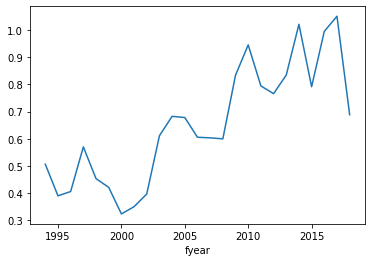

In [69]:
sel=(CompustatData.naics > 484000) & (CompustatData.naics < 486000) 
Naics484=pd.pivot_table(CompustatData[sel], values=['mkvalt','sale'], columns=['fyear'], aggfunc=np.sum).T
Naics484['ratio']=Naics484.mkvalt/Naics484.sale
Naics484.ratio.plot()

In [71]:
#pd.set_option('display.max_rows', None)

CompustatData[sel][['mkvalt','sale','prcc_f']].groupby([ CompustatData[sel].conm, CompustatData[sel].fyear ]).mean()

mkvalt       sale    prcc_f
conm                         fyear                                   
ALLIED HOLDINGS INC          1994      92.700000    297.236   12.0000
                             1995      66.628125    381.464    8.6250
                             1996      62.480000    392.547    8.0000
                             1997     149.538375    581.530   19.1250
                             1998     113.246250   1026.799   14.3750
                             1999      48.804000   1081.309    6.1250
                             2000      22.132000   1069.154    2.7500
                             2001      16.432700    896.767    2.0200
                             2002      28.126140    898.060    3.3400
                             2003      41.804280    865.463    4.7700
                             2004      25.419150    895.213    2.8500
                             2005       5.388000    892.934    0.6000
                             2006      10.776000    893.837    1.2000
AMERICAN FREIGHTWAYS CORP    1994     606.108000    465.588   19.8750
                             1995     320.909125    572.100   10.3750
                             1996     347.567250    729.042   11.1250
                             1997     311.734000    870.319    9.8750
                             1998     365.311584    986.286   11.5313
                             1999     521.949750   1166.675   16.1875
AMERICAN MEDICAL RESPONSE    1994     426.368250    311.727   28.8750
                             1995     645.710000    483.846   32.5000
                             1996            NaN    719.408   32.5000
AMPACE CORP                  1995       8.400000     21.242    3.0000
                             1996       3.459375     30.446    1.1250
                             1997       3.226356     34.857    1.0620
ARCBEST CORP                 1994     236.607250   1098.421   12.1250
                             1995     153.712125   1437.279    7.8750
                             1996      85.330000   1659.184    4.3750
                             1997     191.061000   1643.678    9.7500
                             1998     114.596918   1651.453    5.8438
                             1999     237.024000   1721.586   12.0000
                             2000     369.161687   1839.567   18.3125
                             2001     705.571240   1526.206   28.8200
                             2002     647.238672   1422.297   25.9810
                             2003     787.632560   1527.473   31.4600
                             2004    1134.549860   1715.763   44.8900
                             2005    1108.554720   1860.269   43.6800
                             2006     894.780000   1860.477   36.0000
                             2007     545.669740   1836.878   21.9400
                             2008     753.472640   1833.052   30.1100
                             2009     737.839530   1472.901   29.4300
                             2010     692.546940   1657.864   27.4200
                             2011     489.881940   1907.609   19.2700
                             2012     244.651900   2065.999    9.5500
                             2013     869.920720   2299.549   33.6800
                             2014    1207.660280   2612.693   46.3700
                             2015     553.102620   2666.905   21.3900
                             2016     708.088850   2700.219   27.6500
                             2017     916.773000   2826.457   35.7500
                             2018     876.610620   3093.788   34.2600
ARROW TRANSPORTATION CO      1994      18.459000     34.110    4.5000
                             1995       5.176250     31.416    1.2500
                             1996       2.355342     27.579    0.5620
ASCHE TRANSPORTATION SVCS    1994      18.490625     26.319    7.6250
                             1995      20.721750     67.748    5.2500
                             1996      20.259125    